# Projet python

## Auteurs

- DIEDHIOU Mamadou
- NGETH Laurent

Github : https://github.com/lngeth/Fire_departure_analysis

## Description du projet

In [1]:
import pandas as pd
from Scrapper import Scrapper
from Tools import generate_date_ranges_months

# Vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

Nous traitons avec des données d'incendies en France du site web : https://bdiff.agriculture.gouv.fr/incendies.  
On cherche à savoir si ces évènements sont concentrés dans des endroits précis en France, ou bien ces évènements sont purement aléatoires.  
  
Pour ce faire, nous allons scraper nos données avec Selenium et faire nos analyses/vizualisation avec Seaborn et Matplotlib.

## Scraping

Tout d'abord, définissons la période à laquelle nous voulons analyser nos données.  
Nous choisissons de prendre toute l'année 2023.  
  
Toutefois, nous ne pouvons pas juste récupérer l'année entière directement car il y a des problèmes de serveur avec le site où nous scrappons nos données.  
Nous séparons donc notre récupération en chunk de 3 mois.

In [2]:
start_date = "01/01/2023"
end_date = "31/12/2023"
date_ranges = generate_date_ranges_months(start_date, end_date, months=2)
date_ranges

[('01/01/2023', '28/02/2023'),
 ('01/03/2023', '30/04/2023'),
 ('01/05/2023', '30/06/2023'),
 ('01/07/2023', '31/08/2023'),
 ('01/09/2023', '31/10/2023'),
 ('01/11/2023', '31/12/2023')]

Nous allons utiliser la classe Scrapper que nous avons définie dans le fichier Scrapper.py.  
Cette classe permet de scraper le site web cité plus haut afin d'obtenir un DataFrame pandas que nous pourrons analyser par la suite.  
  
Nous avons développé le scraping en utilisant la programmation concurrente afin de paralléliser la récupération des données, permettant d'accélérer le processus de récupération.  
Sans cela, la récupération des données aurait pris entre 30 minutes et 1h pour seulement ~2600 observations.  
Avec la programmation concurrente, on descend à 15 minutes.

In [3]:
dfs = []
for d in date_ranges:
  dfs.append(Scrapper().generate_dataframe(d[0], d[1]))
fire_departure_df = pd.concat(dfs, ignore_index=True)

12 max workers...
[('01/01/2023', '31/01/2023'), ('01/02/2023', '28/02/2023')]
Scrapping done successfully...
Scrapping done successfully...
12 max workers...
[('01/03/2023', '31/03/2023'), ('01/04/2023', '30/04/2023')]
Scrapping done successfully...
Scrapping done successfully...
12 max workers...
[('01/05/2023', '31/05/2023'), ('01/06/2023', '30/06/2023')]
Scrapping done successfully...
Scrapping done successfully...
12 max workers...
[('01/07/2023', '31/07/2023'), ('01/08/2023', '31/08/2023')]
Scrapping done successfully...
Scrapping done successfully...
12 max workers...
[('01/09/2023', '01/10/2023'), ('02/10/2023', '31/10/2023')]
Scrapping done successfully...
Scrapping done successfully...
12 max workers...
[('01/11/2023', '01/12/2023'), ('02/12/2023', '31/12/2023')]
Scrapping done successfully...
Scrapping done successfully...


In [4]:
fire_departure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0                           2694 non-null   object
 1   Année                   2694 non-null   object
 2   Alerte                  2694 non-null   object
 3   Département             2694 non-null   object
 4   Commune                 2694 non-null   object
 5   Surface (ha)            2694 non-null   object
 6   Nature                  2694 non-null   object
 7   Précision de la donnée  2694 non-null   object
dtypes: object(8)
memory usage: 168.5+ KB


Sauvegardons ces données brut scrapés dans un csv afin d'éviter de devoir toujours refaire du scraping.  
Nous les sauvegarderons dans un fichier nommé "raw_fire_departure_2023.csv".

In [5]:
fire_departure_df.to_csv("raw_fire_departure_2023.csv", index=False)

## Import data

Pour éviter de refaire le scraping prédéfini en haut, nous importons le fichier CSV qu'on a enregistré au préalable.

In [2]:
fire_departure_df = pd.read_csv("raw_fire_departure_2023.csv")
fire_departure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              0 non-null      float64
 1   Année                   2694 non-null   int64  
 2   Alerte                  2694 non-null   object 
 3   Département             2694 non-null   object 
 4   Commune                 2694 non-null   object 
 5   Surface (ha)            2694 non-null   float64
 6   Nature                  2694 non-null   object 
 7   Précision de la donnée  2694 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 168.5+ KB


## Data cleaning

Commençons par supprimer les données qui sont doubles.

In [3]:
doublons = fire_departure_df[fire_departure_df.duplicated()]
print(f"Il y a {len(doublons)} données en doubles...")

Il y a 25 données en doubles...


In [4]:
fire_departure_df.drop_duplicates()
fire_departure_df.reset_index(inplace=True)
fire_departure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   2694 non-null   int64  
 1   Unnamed: 0              0 non-null      float64
 2   Année                   2694 non-null   int64  
 3   Alerte                  2694 non-null   object 
 4   Département             2694 non-null   object 
 5   Commune                 2694 non-null   object 
 6   Surface (ha)            2694 non-null   float64
 7   Nature                  2694 non-null   object 
 8   Précision de la donnée  2694 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 189.6+ KB


Gardons uniquement les colonnes qui nous intéressent.

In [5]:
fire_departure_df.columns

Index(['index', 'Unnamed: 0', 'Année', 'Alerte', 'Département', 'Commune',
       'Surface (ha)', 'Nature', 'Précision de la donnée'],
      dtype='object')

In [6]:
fire_departure_df = fire_departure_df.drop(columns=["index", "Année", "Unnamed: 0", "Précision de la donnée"], axis=1) # As we consider only 2023 year, we don't need "Année"
fire_departure_df.head()

,Alerte,Département,Commune,Surface (ha),Nature
0,01/01/2023 10:05,2B,Cagnano,0.0100,Malveillance
1,01/01/2023 15:29,88,Dommartin-lès-Remiremont,0.0002,-
2,01/01/2023 17:54,40,Labatut,0.1000,Accidentelle
3,01/01/2023 18:11,64,Iholdy,1.0000,-
4,02/01/2023 20:59,83,Rayol-Canadel-sur-Mer,0.0035,Involontaire (particulier)


Convertissons les columns dans les bons types.

In [7]:
fire_departure_df['Alerte'] = pd.to_datetime(fire_departure_df['Alerte'], format='%d/%m/%Y %H:%M')

In [8]:
fire_departure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Alerte        2694 non-null   datetime64[ns]
 1   Département   2694 non-null   object        
 2   Commune       2694 non-null   object        
 3   Surface (ha)  2694 non-null   float64       
 4   Nature        2694 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 105.4+ KB


Description des données :
- Alerte : La date à laquelle l'incendie a été alerté.
- Département : Le département français de l'incendie.
- Commune : La commune française de l'incendie.
- Surface (ha) : La surface en hectare brûlée par l'incendie.
- Nature : La cause de l'incendie.

## Vizualisation

### Répartition des incendies et ses causes dans l'année

Commençons par regarder la répartition des incendies dans l'année.

In [9]:
fire_departure_df['Mois'] = fire_departure_df['Alerte'].dt.month

In [10]:
fire_departure_df['Nature'].unique()

array(['Malveillance', '-', 'Accidentelle', 'Involontaire (particulier)',
       'Involontaire (travaux)', 'Naturelle'], dtype=object)

In [24]:
maleficient_fire_departure_df = fire_departure_df[fire_departure_df['Nature'] == "Malveillance"]
non_maleficient_fire_departure_df = fire_departure_df[fire_departure_df['Nature'] != "Malveillance"]

print("Feu malveillant: {:d}, Feu !malvaillant: {:d}".format(len(maleficient_fire_departure_df), len(non_maleficient_fire_departure_df)))

Feu malveillant: 472, Feu !malvaillant: 2222


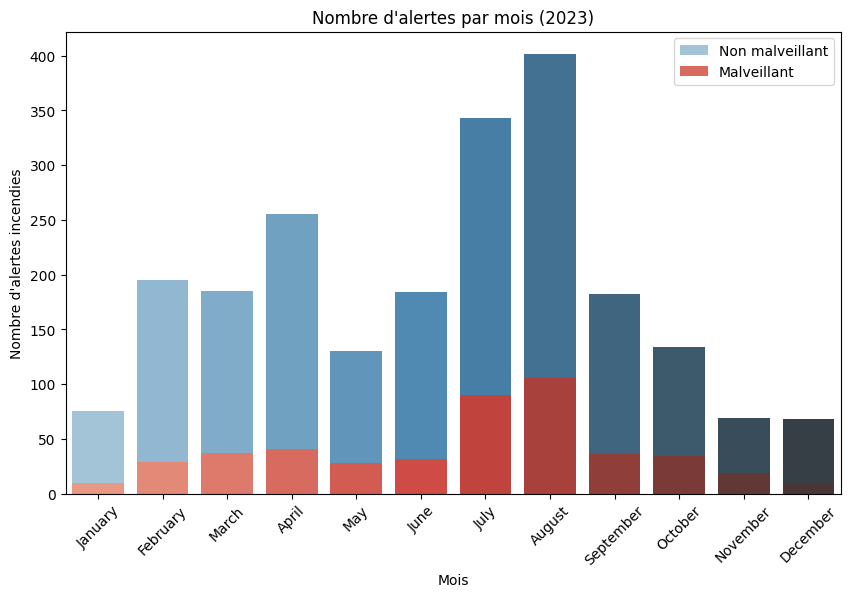

In [72]:
non_maleficient_alertes_per_month = non_maleficient_fire_departure_df['Mois'].value_counts().sort_index().reset_index()
non_maleficient_alertes_per_month.columns = ['Mois', 'Nb alertes']
non_maleficient_alertes_per_month["Mois"] = [
  'January', 'February', 'March', 'April', 'May', 'June',
  'July', 'August', 'September', 'October', 'November', 'December'
]

maleficient_alertes_per_month = maleficient_fire_departure_df['Mois'].value_counts().sort_index().reset_index()
maleficient_alertes_per_month.columns = ['Mois', 'Nb alertes']
maleficient_alertes_per_month["Mois"] = [
  'January', 'February', 'March', 'April', 'May', 'June',
  'July', 'August', 'September', 'October', 'November', 'December'
]

plt.figure(figsize=(10,6))
sns.barplot(x=non_maleficient_alertes_per_month['Mois'], y=non_maleficient_alertes_per_month['Nb alertes'], palette='Blues_d')
ax1 = plt.gca().get_children()
sns.barplot(x=maleficient_alertes_per_month['Mois'], y=maleficient_alertes_per_month['Nb alertes'], palette='Reds_d')
ax2 = plt.gca().get_children()

plt.title('Nombre d\'alertes par mois (2023)')
plt.xlabel('Mois')
plt.xticks(rotation=45)
plt.ylabel('Nombre d\'alertes incendies')
plt.legend([ax1[0], ax2[30]], ["Non malveillant", "Malveillant"])

plt.show()

On voit que certaines périodes semblent avoir plus d'incendies déclarés que d'autres, quelle que soit la nature de l'incendie, notamment en juillet-août.  
Serait-ce à cause de la chaleur ? Probablement.  
  
Voyons quelle est la proportion des causes d'incendies.

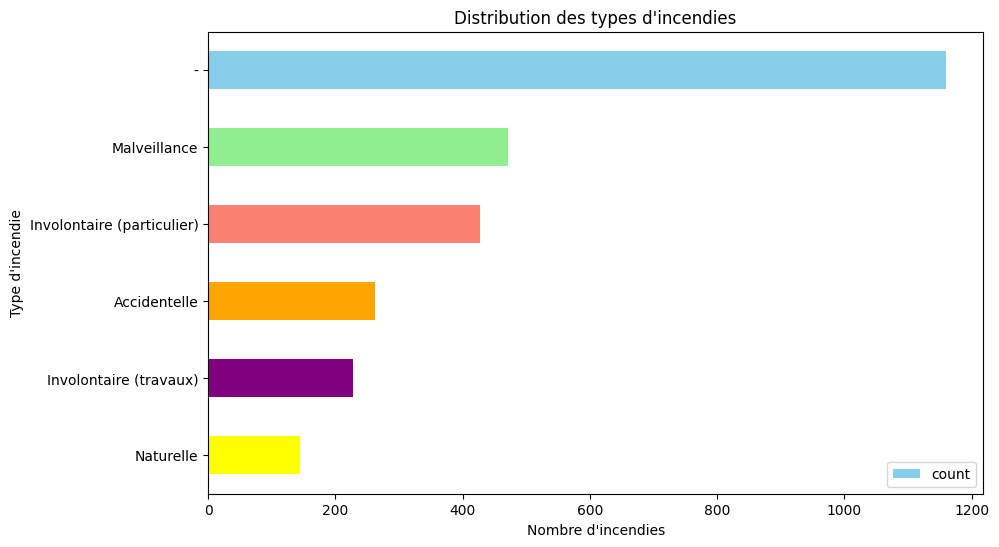

In [61]:
# Compter les occurrences par type de végétation 
nature_count = fire_departure_df['Nature'].value_counts()

# Liste de couleurs personnalisées (autant de couleurs que de catégories dans 'Nature')
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple', 'yellow', 'lightcoral']

# Visualiser
plt.figure(figsize=(10,6))
bar = nature_count.plot(kind='barh', color=colors)  
plt.title('Distribution des types d\'incendies')
plt.xlabel('Nombre d\'incendies')
plt.ylabel('Type d\'incendie')
plt.gca().invert_yaxis()
plt.show()

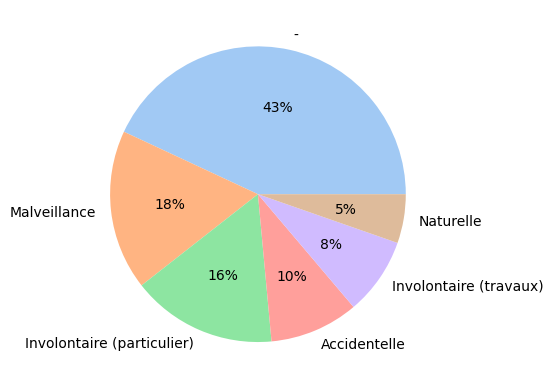

In [65]:
colors = sns.color_palette('pastel')[0:6]
plt.pie(nature_count.values, labels = nature_count.index, colors = colors, autopct='%.0f%%')
plt.show()

On voit qu'une grande majorité des incendies (43%) est de source inconnue... mais parmi les cas identifiés, les causes non malveillantes restent majoritaires par rapport aux incendies malveillants (39% contre 18% respectivement).

### Surface en hectare brûlée

La surface en hectare brûlé est-elle en lien avec la quantité d'incendies ?  
Autrement dit, les mois où il y a le plus d'incendies sont-elles également les périodes où la surface en hectare brûlée est la plus grande ?

<Figure size 1000x600 with 0 Axes>

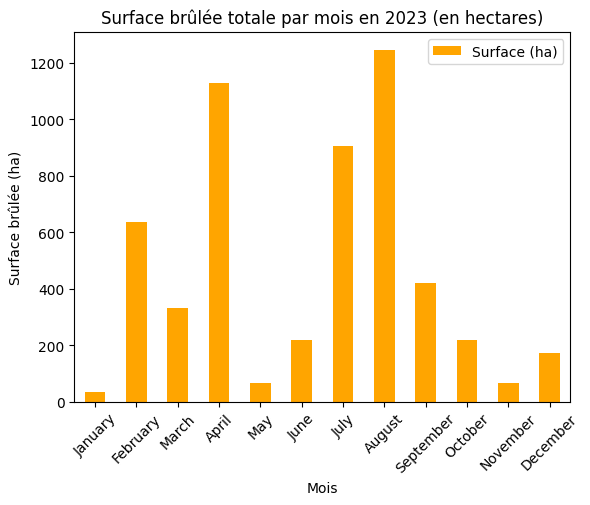

In [93]:
# Calculer la surface brûlée totale par mois
surface_by_month = fire_departure_df.groupby('Mois')['Surface (ha)'].sum()

# Réorganiser l'ordre des mois (janvier à décembre)
surface_by_month = surface_by_month.reset_index()
surface_by_month['Mois'] = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
surface_by_month.set_index("Mois", inplace=True)

# Visualiser la surface brûlée par mois
plt.figure(figsize=(10,6))
surface_by_month.plot(kind='bar', color='orange')
plt.title('Surface brûlée totale par mois en 2023 (en hectares)')
plt.ylabel('Surface brûlée (ha)')
plt.xlabel('Mois')
plt.xticks(rotation=45)
plt.show()

D'après le graphique précédent, avec la distribution des incendies dans les mois de l'année, la plupart des incendies étaient en avril, juillet et août.  
Ici, on a la même observation, il y a toujours davantage de surface en hectare brûlée pendant ces périodes.  
En revanche, le mois d'avril a reçu plus de dégâts que juillet, ce qui est en contradiction avec le nombre d'incendies.  
  
On peut donc dire que le nombre d'incendies n'évolue pas forcément dans le même sens que la quantité d'hectares brûlés.

### La nature d'incendie la plus destructrice

Même s'il y a plus d'incendies non expliqués que d'autres causes, il est possible que certains incendies soient plus destructeurs que d'autres.

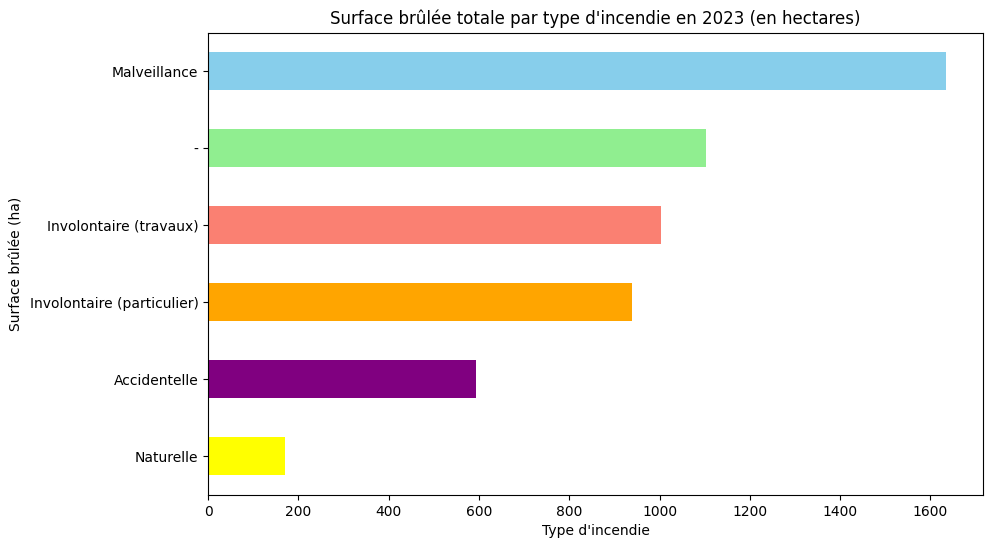

In [94]:
fire_departure_df['Surface (ha)'] = pd.to_numeric(fire_departure_df['Surface (ha)'], errors='coerce')

# Calculer la surface brûlée totale par type d'incendie
surface_by_type = fire_departure_df.groupby('Nature')['Surface (ha)'].sum()
surface_by_type = surface_by_type.sort_values(ascending=False) # Trier les valeurs par ordre décroissant

colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple', 'yellow', 'lightcoral']

# Visualiser la surface brûlée par type d'incendie
plt.figure(figsize=(10,6))
surface_by_type.plot(kind='barh', color=colors)  
plt.title('Surface brûlée totale par type d\'incendie en 2023 (en hectares)')
plt.ylabel('Surface brûlée (ha)')
plt.xlabel('Type d\'incendie')
plt.gca().invert_yaxis()
plt.show()

On voit bien que les incendies ayant une origine malveillante sont, au final, les plus destructeurs, malgré leur "faible" nombre dans l'année...

### Les départements les plus touchés

Etant donné qu'il existe beaucoup de départements français (une centaine), il serait difficile d'afficher et de rendre lisible un graphique représentant les dégâts de chaque département...  
Nous allons donc afficher les 20 premiers départements les plus touchés.

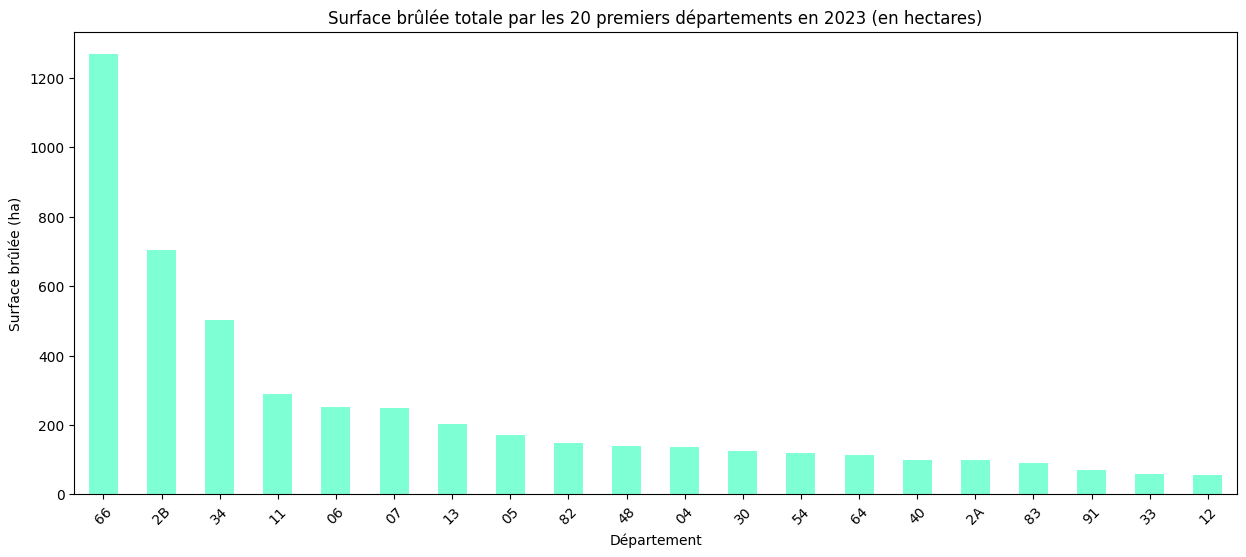

In [96]:
surface_by_department = fire_departure_df.groupby('Département')['Surface (ha)'].sum()
top_20_departments = surface_by_department.sort_values(ascending=False).head(20)

# Visualiser la surface brûlée des 20 premiers départements
plt.figure(figsize=(15,6))
top_20_departments.plot(kind='bar', color='#7FFFD4')
plt.title('Surface brûlée totale par les 20 premiers départements en 2023 (en hectares)')
plt.ylabel('Surface brûlée (ha)')
plt.xlabel('Département')
plt.xticks(rotation=45)
plt.show()

On voit que le département 66 de France est le plus touché par les incendies. Voici les communes de ce département :

In [103]:
fire_departure_df[fire_departure_df["Département"] == "66"]["Commune"].unique

<bound method Series.unique of 7              Salses-le-Château
27              Molitg-les-Bains
31              Espira-de-l'Agly
40                         Calce
44                         Céret
                  ...           
2638            Espira-de-l'Agly
2651                       Sauto
2663                   Los Masos
2672                      Fuilla
2678    Saint-Laurent-de-Cerdans
Name: Commune, Length: 97, dtype: object>

Mais quelle est la cause la plus grande d'incendie dans ce département ?

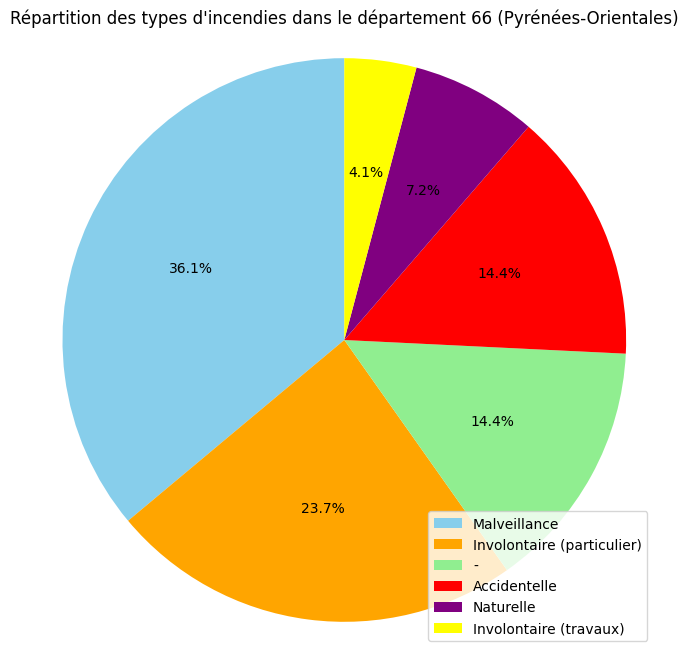

In [104]:
department_66_data = fire_departure_df[fire_departure_df['Département'] == "66"]

nature_distribution_66 = department_66_data['Nature'].value_counts() # Compter les occurrences de chaque type de nature pour le département "66"

plt.figure(figsize=(8,8))
plt.pie(nature_distribution_66, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen', 'red', 'purple', 'yellow'], startangle=90)

plt.title("Répartition des types d'incendies dans le département 66 (Pyrénées-Orientales)")
plt.legend(nature_distribution_66.index, loc="lower right")
plt.axis('equal')
plt.show()

La plupart des incendies dans les Pyrénées-Orientales (département 66) ont des origines malveillantes.

## Conclusion

Sur une seule année, nous ne pouvons pas donner de réelles conclusions. Avec davantage de données, il est possible de réaliser d'avantage d'analyses plus poussées et plus intéressantes. Notamment avec des analyses statistiques.  
En tout cas, on peut dire que l'origine malveillante n'a pas été une cause aussi exceptionnelle en France, en 2023, qu'on pourrait à priori le penser.  

Mise à part cela, ce projet a été très intéressant pour apprendre le langage Python. Il est très utile pour la visualisation et l'exploitation des données.